In [11]:
# File Handling
import os
import glob2 as glob
import pickle

# Plot Handling
import matplotlib.pyplot as plt

# data handling
import numpy as np
import pandas as pd

# Make Plotting interactive
from ipywidgets import interact, fixed

# Wrapper for xraylarch (larch)
os.chdir('..')
pwd = os.getcwd()
os.chdir('./catxas')
import general as fcts
import xas as xfcts
import plot as pfcts
import process
import experiment as exp

%matplotlib inline

In [12]:
biologic_csv = r'C:\Users\ashoff\Desktop\Python Test Bed\b_NiOH2full.csv'

pickle_path = r'C:\Users\ashoff\Desktop\Python Test Bed\Ni70P30low.pickle'

output_dir = r'C:\Users\ashoff\Desktop\Python Test Bed'

fname_correlation = 'bNiOH2_Process'

In [13]:
# Open the Pickle object

pickle_in = open(pickle_path,"rb")
my_exp = pickle.load(pickle_in)
pickle_in.close()

In [4]:
process_df = pd.read_csv(biologic_csv, index_col='time/s')
process_df.index = pd.to_datetime(process_df.index)
process_df

,Ewe/V,<I>/mA
time/s,,
2024-04-03 00:53:14.414200,0.000303,-0.001197
2024-04-03 00:53:14.544200,0.000349,-0.002597
2024-04-03 00:53:14.674200,0.000386,-0.003066
2024-04-03 00:53:14.804200,0.000508,-0.004702
2024-04-03 00:53:14.904200,0.000433,-0.003821
...,...,...
2024-04-03 02:55:38.674100,0.000360,-0.000102
2024-04-03 02:55:38.774100,0.000345,-0.000117
2024-04-03 02:55:38.874100,0.000379,-0.000085


In [5]:
# Add Biologic data to pickle
my_exp.import_process_df(process_df, name = 'Potentiostat')

# Correlate Process-Spectra
my_exp.correlate_process_params()

# Export Summary File
my_exp.save_processparams(os.path.join(output_dir,fname_correlation))

Genearted Spectra Summary
Merged Index for Process: Potentiostat
Process Parameter Data Saved


E̲d̲g̲e̲ ̲S̲t̲e̲p̲ ̲C̲h̲a̲r̲a̲c̲t̲e̲r̲i̲s̲t̲i̲c̲s̲:
	Spectra interrogated: 58
	Largest Edge Step: 0.393
	Smallest Edge Step: 0.244
	Mean Edge Step: 0.285
	Deviation in Edge Step: 0.035


P̲r̲o̲b̲l̲e̲m̲a̲t̲i̲c̲ ̲S̲p̲e̲c̲t̲r̲a̲:
	Number of Spectra: 4
		20240314_Ni70P30_low3_noKOH_Ni_K_EXAFS_92s.tra....
                                          0.392593
		20240314_Ni70P30_low3_noKOH_Ni_K_EXAFS_92s.tra....
                                          0.392583
		20240314_Ni70P30_low3_noKOH_Ni_K_EXAFS_92s.tra....
                                          0.391511
		20240314_Ni70P30_low3_noKOH_Ni_K_EXAFS_92s.tra....
                                          0.391114


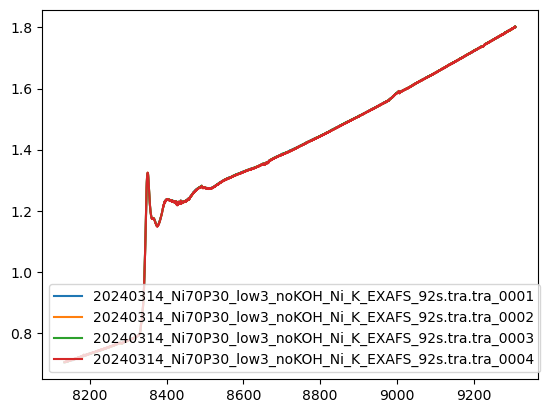

In [14]:
# Checking edge step
spec, step = my_exp.edge_step_screen()

<Axes: >

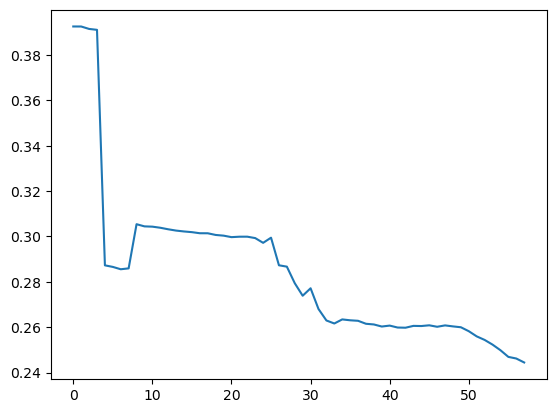

In [15]:
step['Edge Step'].plot()

In [10]:
step.to_csv(os.path.join(output_dir,'Ni70P30_edge_step.csv'), sep = ',')